# comparison_ret_log_plot

#### Juan Camilo Henao Londono - 21.05.2019
#### AG Guhr - Universitaet Duisburg-Essen

In [1]:
# Modules

import numpy as np
from matplotlib import pyplot as plt
import os
import pickle

__tau__ = 1000

In [2]:
def taq_self_cross_response_year_avg_plot(ticker_i, ticker_j, year, months, days):
    """
    Plot the average self- and cross-response during a year and the dayly 
    cross-response contributions in a figure. The data is loaded from the
    cross response data results.
        :param ticker: string of the abbreviation of the midpoint stock to
         be analized (i.e. 'AAPL')
        :param year: string of the year to be analized (i.e '2008')
        :param month: List of strings of the months to be analized
         (i.e ['07', '08', '09'])
        :param days: List of lists of strings with the days to be analized
         (i.e [['07', '08', '09'], ['01', '02']])
    """

    figure = plt.figure(figsize=(16, 9))

    plot_data_year_self_ret = np.zeros(__tau__)
    plot_data_year_self_log = np.zeros(__tau__)
    plot_data_year_cross_ret = np.zeros(__tau__)
    plot_data_year_cross_log = np.zeros(__tau__)

    for month in months:

        plot_data_month_self_ret = np.zeros(__tau__)
        plot_data_month_self_log = np.zeros(__tau__)
        plot_data_month_cross_ret = np.zeros(__tau__)
        plot_data_month_cross_log = np.zeros(__tau__)

        for i, day in enumerate(days[int(month) - 1]):

            load_day_self_ret = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{1}/taq_self_'
                + 'response_data_ret/taq_self_response_data_ret_{1}{2}{3}_{0}'
                + '.pickle').split())
                .format(ticker_i, year, month, day), 'rb'))
            load_day_self_log = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{1}/taq_self_'
                + 'response_data_log/taq_self_response_data_log_{1}{2}{3}_{0}'
                + '.pickle').split())
                .format(ticker_i, year, month, day), 'rb'))
            load_day_cross_ret = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{2}/taq_cross_'
                + 'response_data_ret/taq_cross_response_data_ret_{2}{3}{4}_{0}i'
                + '_{1}j.pickle').split())
                .format(ticker_i, ticker_j, year, month, day), 'rb'))
            load_day_cross_log = pickle.load(open(''.join((
                '../../Cross_response_individual_stock/taq_data_{2}/taq_cross_'
                + 'response_data_log/taq_cross_response_data_log_{2}{3}{4}_{0}i_'
                + '{1}j.pickle')
                .split())
                .format(ticker_i, ticker_j, year, month, day), 'rb'))

            plot_data_month_self_ret += load_day_self_ret
            plot_data_month_self_log += load_day_self_log
            plot_data_month_cross_ret += load_day_cross_ret
            plot_data_month_cross_log += load_day_cross_log

        plot_data_month_self_ret = plot_data_month_self_ret / len(days[int(month) - 1])
        plot_data_month_self_log = plot_data_month_self_log / len(days[int(month) - 1])
        plot_data_month_cross_ret = plot_data_month_cross_ret / len(days[int(month) - 1])
        plot_data_month_cross_log = plot_data_month_cross_log / len(days[int(month) - 1])

        plot_data_year_self_ret += plot_data_month_self_ret
        plot_data_year_self_log += plot_data_month_self_log
        plot_data_year_cross_ret += plot_data_month_cross_ret
        plot_data_year_cross_log += plot_data_month_cross_log
        
    plot_data_year_self_ret = plot_data_year_self_ret / len(months)
    plot_data_year_self_log = plot_data_year_self_log / len(months)
    plot_data_year_cross_ret = plot_data_year_cross_ret / len(months)
    plot_data_year_cross_log = plot_data_year_cross_log / len(months)
        
    ax1 = plt.subplot(211)
    ax1.semilogx(plot_data_year_self_ret, '-', linewidth=5,
                 label='Midpoint returns')
    ax1.semilogx(plot_data_year_self_log, '-', linewidth=5,
                 label='Midpoint logreturns')

    ax1.set_xlabel(r'Time lag $[\tau]$')
    ax1.set_ylabel(r'Self response $ R_{ii} (\tau) $')
    ax1.legend(loc='best')
    ax1.set_title('Self response - comparison')
    ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax1.set_xlim(1, 1000)
    ax1.set_ylim(1 * 10 ** -4, 2 * 10 ** -4)
    ax1.annotate(r'$r_i \left( t, \tau \right) = \frac{m_i \left( t + \tau \right) - m_i \left( t \right)}{m_i \left( t \right)}$',
                 xy=(2, 0.00018), fontsize=25)
    ax1.annotate(r'$r_i \left( t, \tau \right) = \ln \left( \frac{m_i \left( t + \tau \right)}{m_i \left( t \right)} \right)$',
                 xy=(2, 0.00015), fontsize=25)
    ax1.grid(True)
    plt.tight_layout()
    
    ax2 = plt.subplot(212)
    ax2.semilogx(plot_data_year_cross_ret, '-', linewidth=5,
                 label='Midpoint returns')
    ax2.semilogx(plot_data_year_cross_log, '-', linewidth=5,
                 label='Midpoint logreturns')

    ax2.set_xlabel(r'Time lag $[\tau]$')
    ax2.set_ylabel(r'Cross response $ R_{ii} (\tau) $')
    ax2.legend(loc='best')
    ax2.set_title('Cross response - comparison')
    ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
    ax2.set_xlim(1, 1000)
    ax2.set_ylim(3 * 10 ** -5, 8 * 10 ** -5)
    ax2.grid(True)
    plt.tight_layout()


    return None

In [3]:
def months_days_list(folder_path, ticker, year):
    """
    Generate two lists with the string with the numbers of the months
    (from '01' to '12') and the days of the data to be analyzed.
    """
    days = []
    days_list = []
    months_list = []

    for i in range(1, 32):
        if (i < 10):
            days.append('0' + str(i))
        else:
            days.append(str(i))

    for m in range(1, 13):
        if (m < 10):
            months_list.append('0' + str(m))
        else:
            months_list.append(str(m))

    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    for month in months_list:
        days_month = []
        for d in days:
            for file in files:
                val_split = file.split('_')
                date = val_split[-1].split('.')[0]
                val = val_split[1] + val_split[2] + date
                if (val == '{}quotes{}{}{}'.format(ticker, year, month, d)):
                    days_month.append(d)
        days_list += [days_month]

    return(months_list, days_list)

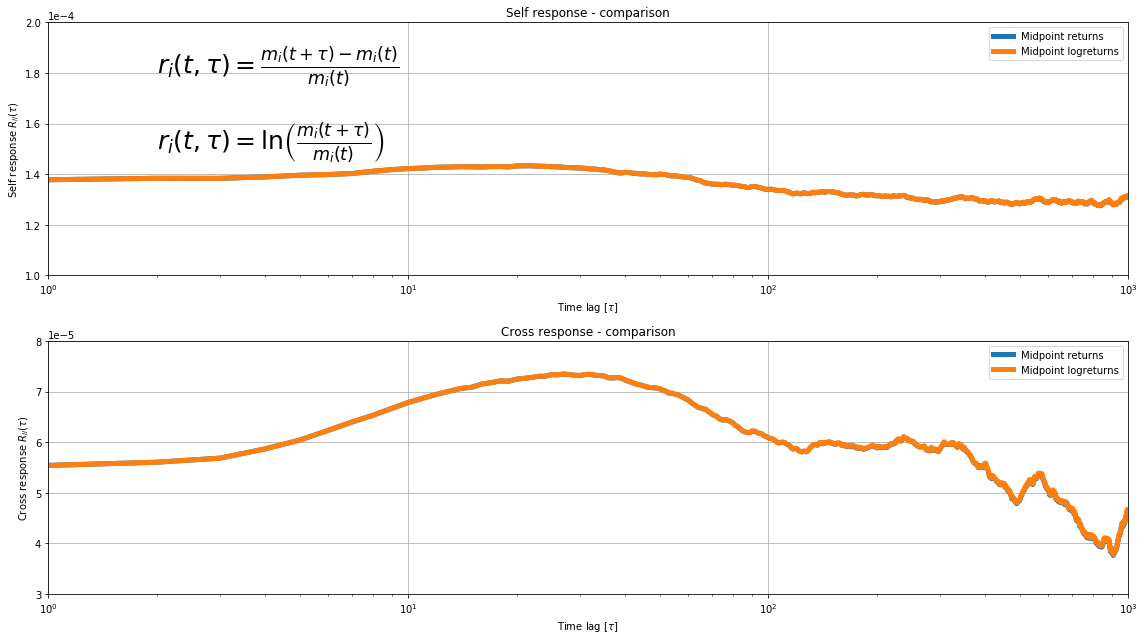

In [4]:
# Test

ticker_i = 'AAPL'
ticker_j = 'MSFT'
year = '2008'
folder_path = '../../TAQ_2008/TAQ_py/'
months, days = months_days_list(folder_path, ticker_i, year)

taq_self_cross_response_year_avg_plot(ticker_i, ticker_j, year, months, days)